In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('precision',2)
pd.set_option('display.max_rows',12)
pd.set_option('display.float_format','{:20,.2f}'.format)
plt.style.use('seaborn')

# 10a

In [3]:
weekly = pd.read_csv('/Users/appler/Desktop/ISLR/Weekly.csv',index_col=0)
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,1990,0.82,1.57,-3.94,-0.23,-3.48,0.15,-0.27,Down
2,1990,-0.27,0.82,1.57,-3.94,-0.23,0.15,-2.58,Down
3,1990,-2.58,-0.27,0.82,1.57,-3.94,0.16,3.51,Up
4,1990,3.51,-2.58,-0.27,0.82,1.57,0.16,0.71,Up
5,1990,0.71,3.51,-2.58,-0.27,0.82,0.15,1.18,Up


Data Dictionary:
A data frame with 1089 observations on the following 9 variables.

Year
The year that the observation was recorded

Lag1
Percentage return for previous week

Lag2
Percentage return for 2 weeks previous

Lag3
Percentage return for 3 weeks previous

Lag4
Percentage return for 4 weeks previous

Lag5
Percentage return for 5 weeks previous

Volume
Volume of shares traded (average number of daily shares traded in billions)

Today
Percentage return for this week

Direction
A factor with levels Down and Up indicating whether the market had a positive or negative return on a given week

In [7]:
weekly.Direction = weekly.Direction.astype('category')
weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,1990,0.82,1.57,-3.94,-0.23,-3.48,0.15,-0.27,Down
2,1990,-0.27,0.82,1.57,-3.94,-0.23,0.15,-2.58,Down
3,1990,-2.58,-0.27,0.82,1.57,-3.94,0.16,3.51,Up
4,1990,3.51,-2.58,-0.27,0.82,1.57,0.16,0.71,Up
5,1990,0.71,3.51,-2.58,-0.27,0.82,0.15,1.18,Up
...,...,...,...,...,...,...,...,...,...
1085,2010,-0.86,0.04,-2.17,3.60,0.01,3.21,2.97,Up
1086,2010,2.97,-0.86,0.04,-2.17,3.60,4.24,1.28,Up
1087,2010,1.28,2.97,-0.86,0.04,-2.17,4.84,0.28,Up
1088,2010,0.28,1.28,2.97,-0.86,0.04,4.45,1.03,Up


In [8]:
weekly.describe(include='all')

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
count,"1,089.00","1,089.00","1,089.00","1,089.00","1,089.00","1,089.00","1,089.00","1,089.00",1089
unique,nan,nan,nan,nan,nan,nan,nan,nan,2
top,nan,nan,nan,nan,nan,nan,nan,nan,Up
freq,nan,nan,nan,nan,nan,nan,nan,nan,605
mean,"2,000.05",0.15,0.15,0.15,0.15,0.14,1.57,0.15,NaN
std,6.03,2.36,2.36,2.36,2.36,2.36,1.69,2.36,NaN
min,"1,990.00",-18.20,-18.20,-18.20,-18.20,-18.20,0.09,-18.20,NaN
25%,"1,995.00",-1.15,-1.15,-1.16,-1.16,-1.17,0.33,-1.15,NaN
50%,"2,000.00",0.24,0.24,0.24,0.24,0.23,1.00,0.24,NaN
75%,"2,005.00",1.41,1.41,1.41,1.41,1.41,2.05,1.41,NaN


In [5]:
weekly.shape

(1089, 9)

In [9]:
weekly.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [10]:
weekly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1089 entries, 1 to 1089
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Year       1089 non-null   int64   
 1   Lag1       1089 non-null   float64 
 2   Lag2       1089 non-null   float64 
 3   Lag3       1089 non-null   float64 
 4   Lag4       1089 non-null   float64 
 5   Lag5       1089 non-null   float64 
 6   Volume     1089 non-null   float64 
 7   Today      1089 non-null   float64 
 8   Direction  1089 non-null   category
dtypes: category(1), float64(7), int64(1)
memory usage: 77.7 KB


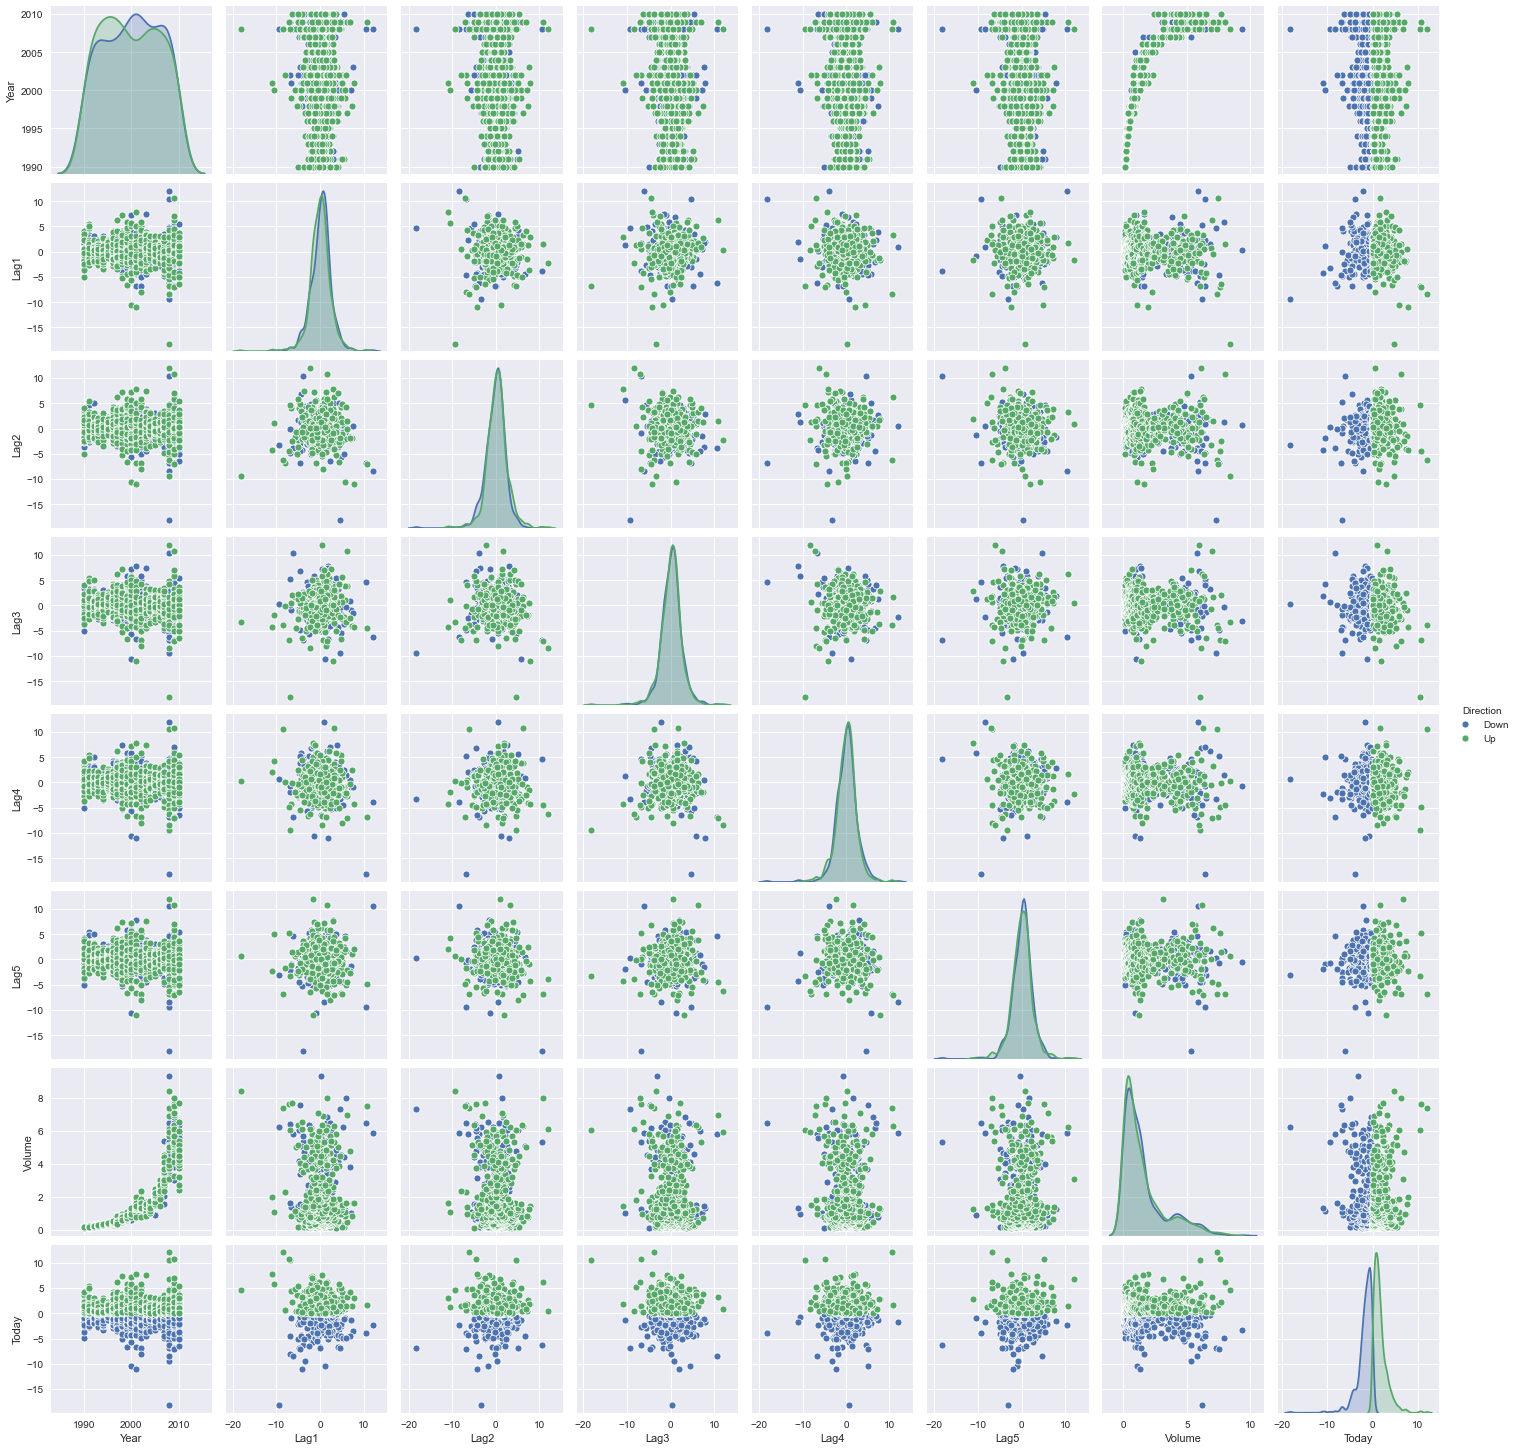

In [11]:
sns.pairplot(weekly, hue='Direction')
#Up is green dots, #Blue is blue dots

In [12]:
weekly.corr()#volume and Year has a strong positive correlation, correlation factor = 0.84

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00,-0.03,-0.03,-0.03,-0.03,-0.03,0.84,-0.03
Lag1,-0.03,1.00,-0.07,0.06,-0.07,-0.01,-0.06,-0.08
Lag2,-0.03,-0.07,1.00,-0.08,0.06,-0.07,-0.09,0.06
Lag3,-0.03,0.06,-0.08,1.00,-0.08,0.06,-0.07,-0.07
Lag4,-0.03,-0.07,0.06,-0.08,1.00,-0.08,-0.06,-0.01
Lag5,-0.03,-0.01,-0.07,0.06,-0.08,1.00,-0.06,0.01
Volume,0.84,-0.06,-0.09,-0.07,-0.06,-0.06,1.00,-0.03
Today,-0.03,-0.08,0.06,-0.07,-0.01,0.01,-0.03,1.00


# 10.2 Logistic regression model

In [13]:
#fit a logistic regression model, 
#Lag2 variable is statistically significant with p-value = 0.030. lower than alpha=0.05
import statsmodels.api as sm
X_sm = weekly.loc[:,'Lag1':'Volume']
y_sm = pd.get_dummies(weekly.Direction).iloc[:, 1] # dummy encoding: Up is 1, Down is 0. 

glm_fit_sm = sm.Logit(y_sm, sm.add_constant(X_sm)).fit()
glm_fit_sm.summary()

Optimization terminated successfully.
         Current function value: 1.925080
         Iterations 4


/Users/appler/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/Users/appler/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/Users/appler/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:3409: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     Up   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Fri, 11 Sep 2020   Pseudo R-squ.:                     inf
Time:                        06:38:43   Log-Likelihood:                -2096.4
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

In [14]:
glm_fit_sm.pred_table()

array([[ 54., 430.],
       [ 48., 557.]])

Using scikit-learn

In [16]:
from sklearn.linear_model import LogisticRegression

X_sk = weekly.loc[:,'Lag1':'Volume']
y_sk = weekly.Direction

glm_model = LogisticRegression(fit_intercept=True, C=1e9) # Large C for no regularization
glm_fit = glm_model.fit(X_sk, y_sk)

In [17]:
glm_fit.intercept_, glm_fit.coef_

(array([0.26686253]),
 array([[-0.04126771,  0.05844169, -0.01606184, -0.02778928, -0.01447421,
         -0.02274122]]))

In [18]:
# prediction summary
pd.DataFrame({'prob_0': glm_fit.predict_proba(X_sk)[:, 0], 
              'prob_1': glm_fit.predict_proba(X_sk)[:, 1], 
              'pred_class': glm_fit.predict(X_sk)}, 
             columns=['prob_0', 'prob_1', 'pred_class'])

,prob_0,prob_1,pred_class
0,0.39,0.61,Up
1,0.40,0.60,Up
2,0.41,0.59,Up
3,0.52,0.48,Down
4,0.38,0.62,Up
...,...,...,...
1084,0.46,0.54,Up
1085,0.50,0.50,Up
1086,0.42,0.58,Up
1087,0.45,0.55,Up


# 10.c Compute the confusion matrix

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score

# The confusion matrix tells that the Type I error has 430 wrong predictions, 
# Type II error includes 48 wrong predictions.
conf_m = pd.DataFrame(confusion_matrix(y_sk, glm_fit.predict(X_sk)))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,54,430
1,48,557


In [20]:
# accuracy is only 56%, slightly higher than throwing a coin, 50%.
# logistic regression might not be a good fit for this dataset
print('Accuracy: ' + str(accuracy_score(y_sk, glm_fit.predict(X_sk))))
print('Training Error: ' + str(1 - accuracy_score(y_sk, glm_fit.predict(X_sk))))

Accuracy: 0.5610651974288338
Training Error: 0.43893480257116624


# 10d fit logistic regression model with training adn test dataset, lag2 as only predictor

In [21]:
# separate training and test sets
train = weekly.loc[weekly.Year < 2009]
test = weekly.loc[weekly.Year >= 2009]

In [63]:
X_sk_train = train.loc[:,'Lag2':'Lag3']
y_sk_train = train.Direction

X_sk_test = test.loc[:,'Lag2':'Lag3']
y_sk_test = test.Direction

glm_model_t = LogisticRegression(fit_intercept=True, C=1e9) # Large C for no regularization
glm_fit_t = glm_model.fit(X_sk_train, y_sk_train)

In [23]:
# prediction summary
pd.DataFrame({'prob_0': glm_fit_t.predict_proba(X_sk_test)[:, 0], 
              'prob_1': glm_fit_t.predict_proba(X_sk_test)[:, 1], 
              'pred_class': glm_fit_t.predict(X_sk_test)}, 
             columns=['prob_0', 'prob_1', 'pred_class'])

,prob_0,prob_1,pred_class
0,0.50,0.50,Down
1,0.43,0.57,Up
2,0.61,0.39,Down
3,0.60,0.40,Down
4,0.56,0.44,Down
...,...,...,...
99,0.50,0.50,Up
100,0.53,0.47,Down
101,0.45,0.55,Up
102,0.50,0.50,Up


In [64]:
conf_m = pd.DataFrame(confusion_matrix(y_sk_test, glm_fit.predict(X_sk_test)))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,8,35
1,4,57


In [65]:
# With only lag2 in the logistic regression, the accuracy score is 62.5%, 
#better than logistic regression with all variables
print('Accuracy: ' + str(accuracy_score(y_sk_test, glm_fit.predict(X_sk_test))))
print('Test Error: ' + str(1 - accuracy_score(y_sk_test, glm_fit.predict(X_sk_test))))

Accuracy: 0.625
Test Error: 0.375


# 10e Using LDA

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_train = train.loc[:,'Lag2':'Lag3']
y_train = train.Direction

X_test = test.loc[:,'Lag2':'Lag3']
y_test = test.Direction

lda_model = LinearDiscriminantAnalysis()
lda_fit = lda_model.fit(X_train, y_train)

In [27]:
lda_fit.priors_ # group priors

array([0.44771574, 0.55228426])

In [29]:
lda_fit.means_ # group means

array([[-0.03568254,  0.17080045],
       [ 0.26036581,  0.08404044]])

In [30]:
lda_fit.scalings_ # coefficients of l

array([[ 0.42459797],
       [-0.08880475]])

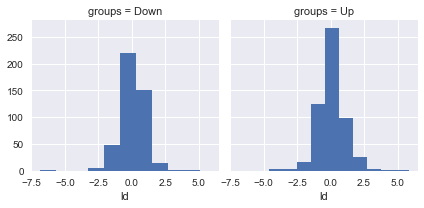

In [31]:
# for plotting lda, needs imporovement
ld_sc = X_train.iloc[:, 0] * lda_fit.scalings_[0] + X_train.iloc[:, 1] * lda_fit.scalings_[1]

ld = pd.DataFrame({'groups': y_train, 'ld': ld_sc})

g = sns.FacetGrid(ld, col='groups')
g.map(plt.hist, 'ld');

In [32]:
# prediction summary
pd.DataFrame({'prob_0': lda_fit.predict_proba(X_test)[:, 0], 
              'prob_1': lda_fit.predict_proba(X_test)[:, 1], 
              'pred_class': lda_fit.predict(X_test)}, 
             columns=['prob_0', 'prob_1', 'pred_class'])

,prob_0,prob_1,pred_class
0,0.48,0.52,Up
1,0.35,0.65,Up
2,0.53,0.47,Down
3,0.50,0.50,Up
4,0.47,0.53,Up
...,...,...,...
99,0.44,0.56,Up
100,0.46,0.54,Up
101,0.41,0.59,Up
102,0.44,0.56,Up


In [35]:
conf_m = pd.DataFrame(confusion_matrix(y_test, lda_fit.predict(X_test)))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,8,35
1,4,57


In [37]:
#LDA has a highly accuracy of 0.625, same as logistic regression
print('Accuracy: ' + str(accuracy_score(y_sk_test, lda_fit.predict(X_test))))
print('Test Error: ' + str(1 - accuracy_score(y_sk_test, lda_fit.predict(X_test))))

Accuracy: 0.625
Test Error: 0.375


# 10.f QDA

In [38]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

X_train = train.loc[:,'Lag2':'Lag3']
y_train = train.Direction

X_test = test.loc[:,'Lag2':'Lag3']
y_test = test.Direction

qda_model = QuadraticDiscriminantAnalysis()
qda_fit = qda_model.fit(X_train, y_train)

In [39]:
qda_fit.priors_ # group priors

array([0.44771574, 0.55228426])

In [40]:
qda_fit.means_ # group means

array([[-0.03568254,  0.17080045],
       [ 0.26036581,  0.08404044]])

In [41]:
qda_fit.scalings_ # coefficients of ld

[array([5.10060714, 4.70325398]), array([6.01525073, 4.68745592])]

In [42]:
# prediction summary
pd.DataFrame({'prob_0': qda_fit.predict_proba(X_test)[:, 0], 
              'prob_1': qda_fit.predict_proba(X_test)[:, 1], 
              'pred_class': qda_fit.predict(X_test)}, 
             columns=['prob_0', 'prob_1', 'pred_class'])

,prob_0,prob_1,pred_class
0,0.48,0.52,Up
1,0.24,0.76,Up
2,0.33,0.67,Up
3,0.53,0.47,Down
4,0.48,0.52,Up
...,...,...,...
99,0.45,0.55,Up
100,0.48,0.52,Up
101,0.39,0.61,Up
102,0.46,0.54,Up


In [43]:
conf_m = pd.DataFrame(confusion_matrix(y_test, qda_fit.predict(X_test)))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,4,39
1,2,59


In [45]:
#QDA accuracy is higher than logistic regression, lower than LDA. The data distribution have a close to linear boundary
print('Accuracy: ' + str(accuracy_score(y_test, qda_fit.predict(X_test))))
print('Test Error: ' + str(1 - accuracy_score(y_test, qda_fit.predict(X_test))))

Accuracy: 0.6057692307692307
Test Error: 0.3942307692307693


# 10g Use KNN, N=1

In [46]:
from sklearn.neighbors import KNeighborsClassifier

X_train = train.loc[:,'Lag2':'Lag3']
y_train = train.Direction

X_test = test.loc[:,'Lag2':'Lag3']
y_test = test.Direction

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_fit = knn_model.fit(X_train, y_train)

In [47]:
# prediction summary
pd.DataFrame({'prob_0': knn_fit.predict_proba(X_test)[:, 0], 
              'prob_1': knn_fit.predict_proba(X_test)[:, 1], 
              'pred_class': knn_fit.predict(X_test)}, 
             columns=['prob_0', 'prob_1', 'pred_class'])

,prob_0,prob_1,pred_class
0,1.00,0.00,Down
1,0.00,1.00,Up
2,1.00,0.00,Down
3,0.00,1.00,Up
4,0.00,1.00,Up
...,...,...,...
99,0.00,1.00,Up
100,1.00,0.00,Down
101,1.00,0.00,Down
102,0.00,1.00,Up


In [49]:
conf_m = pd.DataFrame(confusion_matrix(y_test, knn_fit.predict(X_test)))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,19,24
1,23,38


In [51]:
#KNN performs the worst with an accuracy score of 54.8%
print('Accuracy: ' + str(accuracy_score(y_test, knn_fit.predict(X_test))))
print('Test Error: ' + str(1 - accuracy_score(y_test, knn_fit.predict(X_test))))

Accuracy: 0.5480769230769231
Test Error: 0.45192307692307687


# 10h LDA model provides the best results on this dataset

# 10i Experiment 

In [66]:
#Build KNN model with k= 3

In [67]:
knn_model2 = KNeighborsClassifier(n_neighbors=3)
knn_fit2 = knn_model2.fit(X_train, y_train)

In [53]:
# prediction summary
pd.DataFrame({'prob_0': knn_fit2.predict_proba(X_test)[:, 0], 
              'prob_1': knn_fit2.predict_proba(X_test)[:, 1], 
              'pred_class': knn_fit2.predict(X_test)}, 
             columns=['prob_0', 'prob_1', 'pred_class'])

,prob_0,prob_1,pred_class
0,1.00,0.00,Down
1,0.00,1.00,Up
2,0.33,0.67,Up
3,0.33,0.67,Up
4,0.33,0.67,Up
...,...,...,...
99,0.00,1.00,Up
100,0.67,0.33,Down
101,0.33,0.67,Up
102,0.33,0.67,Up


In [54]:
conf_m2 = pd.DataFrame(confusion_matrix(y_test, knn_fit2.predict(X_test)))
conf_m2.columns.name = 'Predicted'
conf_m2.index.name = 'True'
conf_m2

Predicted,0,1
True,,
0,16,27
1,20,41


In [55]:
#accuracy score is slightly better than throwing a coin, only 54.8%, not considered as a good model
#accuracy is better than KNN=1
print('Accuracy: ' + str(accuracy_score(y_test, knn_fit2.predict(X_test))))
print('Test Error: ' + str(1 - accuracy_score(y_test, knn_fit2.predict(X_test))))

Accuracy: 0.5480769230769231
Test Error: 0.45192307692307687


In [56]:
#Linear Discriminant Analysis: Include Lag1 and lag2 with Linear Discriminant Analysis

In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_train = train.loc[:,'Lag1':'Lag3']
y_train = train.Direction

X_test = test.loc[:,'Lag1':'Lag3']
y_test = test.Direction

lda_model2 = LinearDiscriminantAnalysis()
lda_fit2 = lda_model2.fit(X_train, y_train)

In [58]:
# prediction summary
pd.DataFrame({'prob_0': lda_fit2.predict_proba(X_test)[:, 0], 
              'prob_1': lda_fit2.predict_proba(X_test)[:, 1], 
              'pred_class': lda_fit2.predict(X_test)}, 
             columns=['prob_0', 'prob_1', 'pred_class'])

,prob_0,prob_1,pred_class
0,0.56,0.44,Down
1,0.31,0.69,Up
2,0.46,0.54,Up
3,0.47,0.53,Up
4,0.46,0.54,Up
...,...,...,...
99,0.43,0.57,Up
100,0.50,0.50,Up
101,0.42,0.58,Up
102,0.44,0.56,Up


In [59]:
conf_m3 = pd.DataFrame(confusion_matrix(y_test, lda_fit2.predict(X_test)))
conf_m3.columns.name = 'Predicted'
conf_m3.index.name = 'True'
conf_m3

Predicted,0,1
True,,
0,8,35
1,9,52


In [60]:
#LDA with lag1 and log 2 variable has a lower accuracy of 0.577, comparing to LDA regression with lag2 variable only. 
print('Accuracy: ' + str(accuracy_score(y_test, lda_fit2.predict(X_test))))
print('Test Error: ' + str(1 - accuracy_score(y_test, lda_fit2.predict(X_test))))

Accuracy: 0.5769230769230769
Test Error: 0.42307692307692313


In [68]:
#Logistic regression with a squared function of lag2

#LDA regression with variable lag2 only is the most accurate model in this study.